In [1]:
%matplotlib inline
import numpy as N
import matplotlib.pyplot as P
import time
import os
import matplotlib.cm as cm
from prefig import *
from scipy.stats import kde
import matplotlib.colors as mcolors
from scipy.stats import mode
from scipy.interpolate import interp2d

In [2]:
font = {'family':'serif', 'size':16}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='medium')

In [3]:
def Ir(Ie, bn, Re, n):
    return Ie*np.exp(-bn*((R/Re)**(1/float(n))-1))

In [4]:
def psf(Io, x, u, sig):
    return Io*np.exp(-0.5*((x-u)/(sig*(2**(0.5))))**2)

In [5]:
def bn(n):
    if n > 0.36:
        return 2*n - (1/3.0) + (4/(405.0*n)) + (46/(25515.0*n*n)) + (131/(1148175.0*n*n*n))
    else:
        return 0.01945 - 0.8902*n + 10.95*n*n - 19.67*n*n*n + 13.43*n*n*n*n

In [19]:
ps = 0.396 #plate scale in arcsec/pix

In [10]:
R = np.linspace(0, 10, 100)

In [290]:
#define first sersic profile fit
s1 = Ir(4.0, bn(0.0526), 12.09*ps, 0.0526)
#define second sersic profile fit
s2 =Ir(1.0, bn(7.2114), 2.909*ps, 7.2114)
#define psf part of fit
p1 = psf(10.0, R, 0, 1.14*ps)

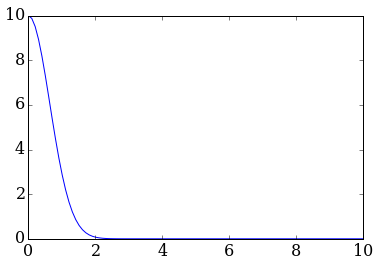

In [302]:
P.plot(R, p1)

In [291]:
from scipy.integrate import cumtrapz as ctp

In [292]:
tfs1 = 10**((22.5 - 25.69)/2.5) 
print tfs1/2
tfs2 = 10**((22.5 - 26.05)/2.5) 
print tfs2/2
tfp1 = 10**((22.5 - 25.03)/2.5) 
print tfp1/2

0.0264831721946
0.019009469816
0.0486373611888


In [293]:
ints1 = ctp(s1, R)
print ints1[-1]
ints2 = ctp(s2, R)
print ints2[-1]
intp1 = ctp(p1, R)
print intp1[-1]

29.4748244614
66527.5809127
8.00156566453


In [294]:
fs1 = np.diff(ints1)
fs2 = np.diff(ints2)
fp1 = np.diff(intp1)

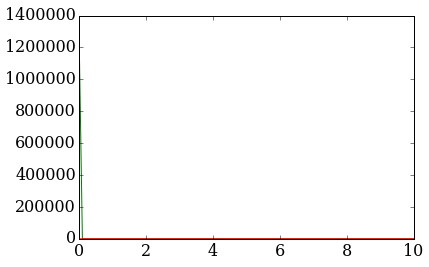

In [295]:
P.plot(R, s1)
P.plot(R, s2)
P.plot(R, p1)

(0, 10)

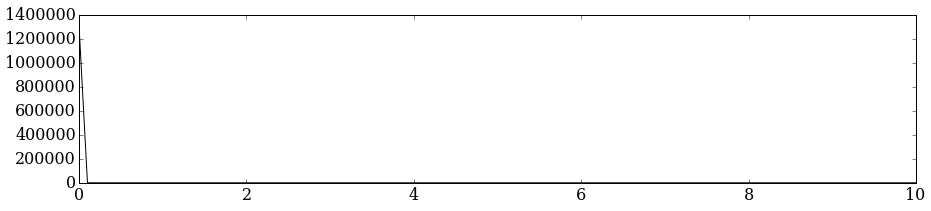

In [296]:
P.figure(figsize=(15,3))
P.plot(R, s1+s2+p1, color='k')
P.xlim(0, 10)

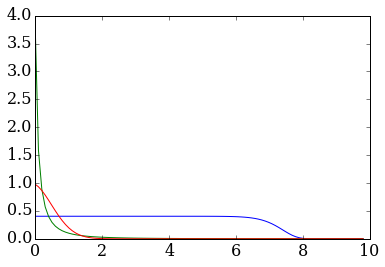

In [297]:
P.plot(R[:-2], fs1)
P.plot(R[:-2], fs2)
P.plot(R[:-2], fp1)

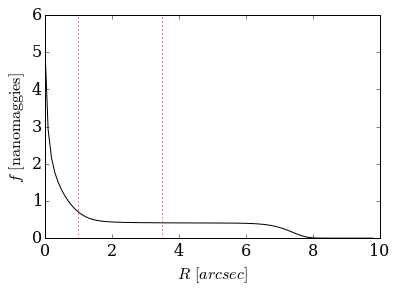

In [298]:
P.plot(R[:-2], fs1+fs2+fp1, color='k')
P.axvline(1.0, color='r', linestyle='dotted')
P.axvline(3.5, color='r', linestyle='dotted')
P.xlabel(r'$R$ $[arcsec]$')
P.ylabel(r'$f$ $\rm{[nanomaggies]}$')

In [299]:
flux = fs1+fs2+fp1
total_flux = 2*np.sum(flux)
i1 = np.searchsorted(R, 1)
i7 = np.searchsorted(R, 3.5)
flux_1asc = 2*np.sum(flux[:i1])
flux_7asc = 2*np.sum(flux[:i7])
flux_gal_1asc = total_flux-flux_1asc
flux_gal_7asc = total_flux-flux_7asc

In [300]:
print total_flux
print flux_1asc
print flux_gal_1asc
print flux_7asc
print flux_gal_7asc


90.712739131
37.3619987091
53.3507404219
60.5123445894
30.2003945417


In [301]:
total_mag = 22.5 - 2.5*np.log10(total_flux)
psf_mag = 22.5 - 2.5*np.log10(flux_1asc)
print total_mag
print psf_mag
gal_1asc_mag = 22.5 - 2.5*np.log10(flux_gal_1asc)
print gal_1asc_mag
gal_7asc_mag = 22.5 - 2.5*np.log10(flux_gal_7asc)
print gal_7asc_mag

17.6058292976
18.5689247472
18.1821488722
18.7999684583


In [233]:
mf = flux_7asc - flux_1asc
print mf

26.2524706337


In [253]:
mag = 22.5 - 2.5*np.log10(np.cumsum(flux))

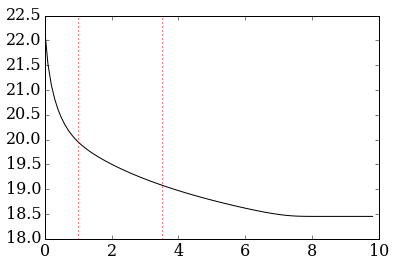

In [255]:
P.plot(R[:-2], mag, color='k')
P.axvline(1.0, color='r', linestyle='dotted')
P.axvline(3.5, color='r', linestyle='dotted')

In [246]:
r = ctp(mag, R[:-2])

In [247]:
r

array([   2.24980693,    4.50406864,    6.76384148,    9.03025741,
         11.3042729 ,   13.58658437,   15.87757788,   18.17730205,
         20.48546788,   22.80148004,   25.12449934,   27.45352904,
         29.78751113,   32.12541595,   34.46631141,   36.80940503,
         39.15405916,   41.49978523,   43.84622504,   46.19312617,
         48.54031716,   50.88768545,   53.23515945,   55.58269502,
         57.9302657 ,   60.27785609,   62.62545743,   64.97306489,
         67.32067585,   69.66828892,   72.01590334,   74.36351874,
         76.71113489,   79.05875169,   81.40636907,   83.753987  ,
         86.10160548,   88.44922453,   90.79684423,   93.14446471,
         95.49208619,   97.839709  ,  100.18733367,  102.53496098,
        104.88259208,  107.23022864,  109.5778731 ,  111.92552892,
        114.27320103,  116.62089638,  118.96862469,  121.31639947,
        123.66423937,  126.01217002,  128.36022638,  130.70845593,
        133.05692272,  135.40571281,  137.75494117,  140.10476